# WordCloud

In [1]:
#!pip install konlpy
import re
import konlpy
import pandas as pd

In [4]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()
    

In [5]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'대출금': 1,
         '리도': 1,
         '사상': 4,
         '최저': 5,
         '은행': 7,
         '예금': 4,
         '금리': 17,
         '시대': 2,
         '연간': 1,
         '만원': 1,
         '얘기': 2,
         '적금': 1,
         '수단': 1,
         '안전': 1,
         '보관': 1,
         '금고': 1,
         '대출': 15,
         '역대': 5,
         '기록': 2,
         '주식': 3,
         '부동산': 2,
         '한국은행': 1,
         '발표': 1,
         '6월': 3,
         '금융': 1,
         '기관': 1,
         '가중': 1,
         '평균': 4,
         '지난달': 1,
         '전월': 3,
         '대비': 3,
         '포인트': 2,
         '처음': 2,
         '정기예금': 1,
         '상품': 1,
         '수준': 2,
         '코로나': 1,
         '사태': 1,
         '이후': 1,
         '한은': 2,
         '기준': 2,
         '집계': 1,
         '가계': 4,
         '신용': 7,
         '주택': 3,
         '담보': 1,
         '대로': 1,
         '이번': 1,
         '정부': 1,
         '규제': 1,
         '강화': 1,
         '사람': 2,
         '때문': 2,
         '관계자': 1,
         '대책': 1

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [ ]:
#나눔 폰트 업로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [3]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = 'C:\\Users\\lsj32\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

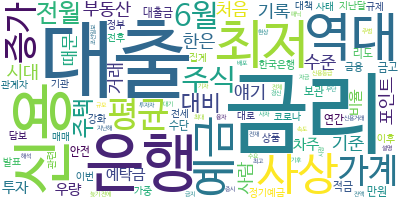

In [8]:
wordcloud = WordCloud(
    relative_scaling='auto', 
    font_path=path, 
    background_color='white')
wordcloud.generate_from_frequencies(c)
wordcloud.to_image()

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [4]:
df = pd.read_csv('train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

In [6]:
df['datetime'].dt.year         # 연(4자리숫자)

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [7]:
df['연'] = df['datetime'].dt.year         # 연(4자리숫자)
df['월'] = df['datetime'].dt.month        # 월(숫자)
df['일'] = df['datetime'].dt.day          # 일(숫자)
df['시간'] = df['datetime'].dt.hour         # 시(숫자)
df['분'] = df['datetime'].dt.minute       # 분(숫자)
df['초'] = df['datetime'].dt.second       # 초(숫자)
df['요일'] = df['datetime'].dt.weekday       # 요일숫자(0-월, 1-화) (=dayofweek)

datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

In [8]:
for i in range(len(df)):
    if df['요일'][i]==0:
        df['요일'][i] = 'Monday'
    elif df['요일'][i]==1:
        df['요일'][i] = 'Tuseday'
    elif df['요일'][i]==2:
        df['요일'][i] = 'Wednesday'
    elif df['요일'][i]==3:
        df['요일'][i] = 'Thursday'
    elif df['요일'][i]==4:
        df['요일'][i] = 'Friday'
    elif df['요일'][i]==5:
        df['요일'][i] = 'Saturday'
    elif df['요일'][i]==6:
        df['요일'][i] = 'Sunday'
    else:pass

<ipython-input-8-7556ea94b25d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['요일'][i] = 'Saturday'
C:\Users\lsj32\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-7556ea94b25d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['요일'][i] = 'Sunday'
<ipython-input-8-7556ea94b25d>:3: SettingWithCopyWarning: 
A value i

In [9]:
df['요일']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: 요일, Length: 10886, dtype: object

## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

In [10]:
import numpy as np
import seaborn as sns
import matplotlib as mpl

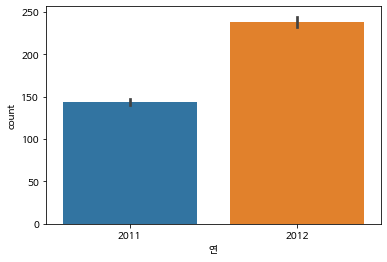

In [30]:
sns.barplot(data = df, x = '연', y = 'count')
plt.show()

2011년보다 2012년의 자전거 대여량이 평균적으로 더 많다.

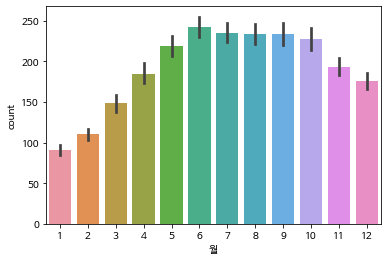

In [33]:
sns.barplot(data = df, x = '월', y = 'count')
plt.show()

1월에서 6월로 갈수록 자전거 대여량이 올라갔다가, 7월부터 1월까지는 다시 자전거 대여량이 하락함을 알 수 있다.

<AxesSubplot:xlabel='season', ylabel='count'>

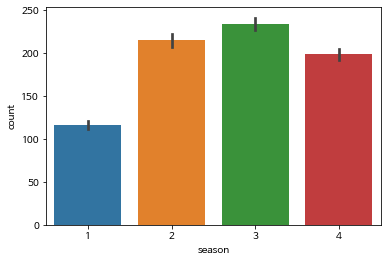

In [29]:
sns.barplot(data = df, x = 'season', y = 'count')

계절로 나누어 보았을 때, 겨울, 가을, 봄, 여름 순으로 자전거 대여량이 적다.

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [42]:
df['연월'] = df[['연', '월']].astype('str').apply('-'.join, axis=1)

In [43]:
df['연월']

0         2011-1
1         2011-1
2         2011-1
3         2011-1
4         2011-1
          ...   
10881    2012-12
10882    2012-12
10883    2012-12
10884    2012-12
10885    2012-12
Name: 연월, Length: 10886, dtype: object

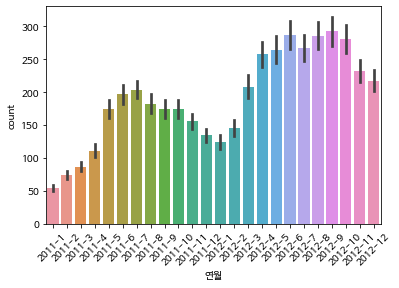

In [45]:
sns.barplot(data = df, x = '연월', y = 'count')
plt.xticks(rotation=45)
plt.show()

2011년에 비해 2012년이 전체적으로 자전거 대여량이 증가하고 있음을 확인할 수 있다.
1월은 2011년 초, 12월은 2011년 말이다. 즉, 1월과 12월이 같은 겨울이고 가까워도 지금 가지고 있는 2개년도에서는,  
1월은 비교적 낮은 값, 12월은 비교적 높은 값을 가진다. (전체적으로 자전거 대여량이 증가하고 있기 때문이다.)

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

In [46]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', '연',
       '월', '일', '시간', '분', '초', '요일', '연월'],
      dtype='object')

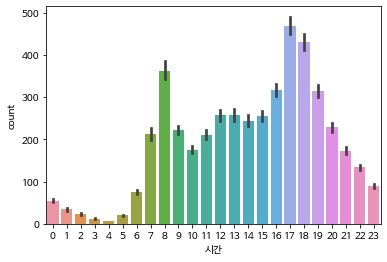

In [47]:

sns.barplot(data = df, x = '시간', y = 'count')
plt.show()

새벽 시간대는 대여량이 적은 편이며, 아침 8시, 그리고 오후 5시-6시가 대여량이 많다.
출/퇴근 시간에 자전거 대여를 많이 한다는 것을 알 수 있다.

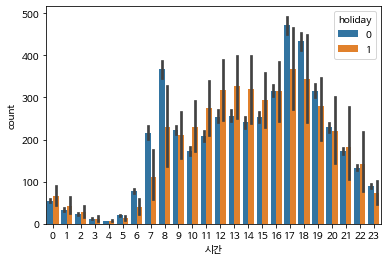

In [48]:
sns.barplot(data = df, x = '시간', y = 'count',hue = 'holiday')
plt.show()

출퇴근 시간의 자전거 대여가 많은 것은, 휴일이 아닌 때의 그 시간대의 자전거 대여가 많기 때문임이 보인다.
다른 시간대들은 휴일일 때에 자전거 대여량이 더 많다.

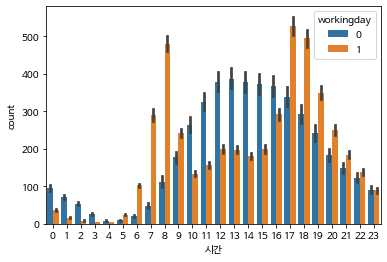

In [49]:
sns.barplot(data = df, x = '시간', y = 'count',hue = 'workingday')
plt.show()

위의 결과와 유사하게,
출퇴근 시간의 자전거 대여가 많은 것은, 근무일일 때의 그 시간대의 자전거 대여가 많기 때문임이 보인다.
다른 시간대들은 근무일이 아닐 때에 자전거 대여량이 더 많다.

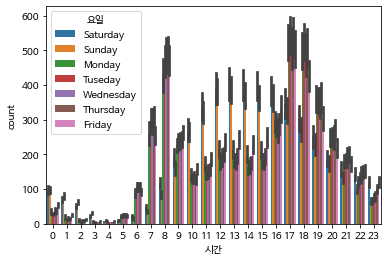

In [11]:
sns.barplot(data = df, x = '시간', y = 'count', hue = '요일')
plt.show()

토요일, 일요일은 낮시간대와 심야시간대에 자전거 대여량이 많고, 평일은 출근시간대에 자전거 대여량이 많다는 것을 볼 수 있다.

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [12]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

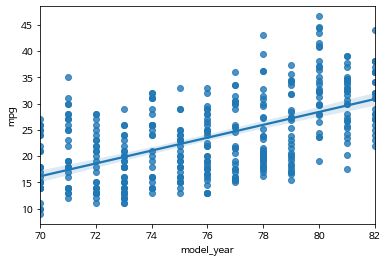

In [15]:
sns.regplot(data = mpg, x = 'model_year', y = 'mpg')
plt.show()

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
